<a href="https://colab.research.google.com/github/shakil1819/CSE442-Machine-Learning-Sessional/blob/main/Waiter-tips/waiter_tips_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

data = pd.read_csv("https://raw.githubusercontent.com/shakil1819/CSE442-Machine-Learning-Sessional/main/Waiter-tips/tips.csv")
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [31]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [32]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols")
figure.show()

In [33]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [34]:
figure = px.pie(data,
             values='tip',
             names='day',hole = 0.5)
figure.show()

In [35]:
figure = px.pie(data,
             values='tip',
             names='sex',hole = 0.5)
figure.show()

In [36]:
figure = px.pie(data,
             values='tip',
             names='smoker',hole = 0.5)
figure.show()

In [37]:
figure = px.pie(data,
             values='tip',
             names='time',hole = 0.5)
figure.show()

In [38]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [39]:
x = np.array(data[["total_bill", "sex", "smoker", "day",
                   "time", "size"]])
y = np.array(data["tip"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=0)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [41]:
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.54335633])

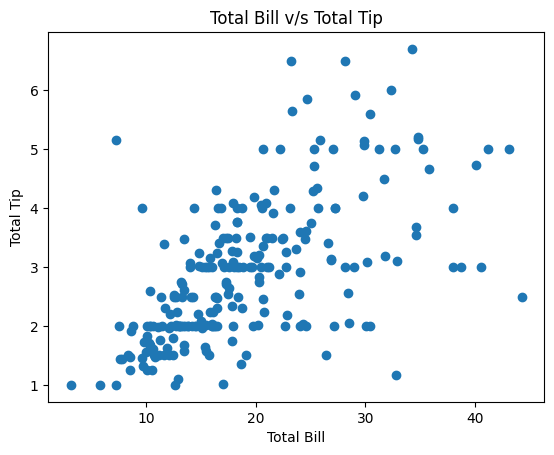

In [42]:
plt.scatter(df['total_bill'], df['tip'])
plt.title('Total Bill v/s Total Tip')
plt.xlabel('Total Bill')
plt.ylabel('Total Tip')
plt.show()


MAE: 0.661911618248884
MSE: 0.8365584111683398
R-squared: 0.5830897914069042


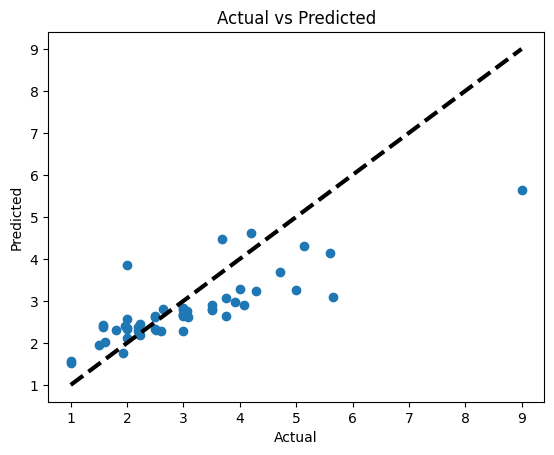

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ypred = model.predict(xtest)

mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

import matplotlib.pyplot as plt

plt.scatter(ytest, ypred)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [50]:
import numpy as np

total_bill = float(input("Enter total bill amount: "))
day = int(input("Enter day (0=Thur, 1=Fri, 2=Sat, 3=Sun): "))
sex = int(input("Enter sex (0=Female, 0, 1=Male): "))
time = int(input("Enter time (0=Lunch, 1=Dinner): "))

features = np.array([[total_bill, sex, 0, day, time, 1]])

predicted_tip = model.predict(features)

print("Predicted Tip:", round(predicted_tip[0],2))

Enter total bill amount: 1000
Enter day (0=Thur, 1=Fri, 2=Sat, 3=Sun): 2
Enter sex (0=Female, 0, 1=Male): 1
Enter time (0=Lunch, 1=Dinner): 1
Predicted Tip: 86.21
